### using urllib to read html data from webpages

In [1]:
from urllib.request import urlopen
x = urlopen('https://www.bbc.co.uk/')
k=x.read()

In [2]:
k

b'<!DOCTYPE html>\n<!--[if lte IE 9]>\n  <html lang="en-GB" class="no-js no-flexbox no-flexboxlegacy b-reith-sans-font">\n<![endif]-->\n<!--[if gt IE 9]><!-->\n  <html lang="en-GB" class="no-js b-reith-sans-font b-reith-serif-font">\n<!--<![endif]-->\n<head>\n    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1"/><script type="text/javascript">\n      var _sf_startpt = (new Date()).getTime();\n    </script><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="The best of the BBC, with the latest news and sport headlines, weather, TV &amp; radio highlights and much more from across the whole of BBC Online" name="description"><meta content="BBC, British Broadcasting Corporation, BBCi, News, Sport, iPlayer, TV, Radio, Food, Music, Business, Arts, Bitesize, Lifestyle, Entertainment, Headlines" name="keywords"><meta property="og:title" content="BBC - Home"><meta property="og:type" content="website"><meta property="og:description" content="The best of 

In [3]:
parts=str(k).split("<a href=")

In [4]:
parts[1:5]

['"https://www.bbc.com/">Home</a></li><li class="orb-nav-newsdotcom">',
 '"https://www.bbc.com/news">News</a></li><li class="orb-nav-sport">',
 '"https://www.bbc.com/sport">Sport</a></li><li class="orb-nav-reeldotcom">',
 '"https://www.bbc.com/reel">Reel</a></li><li class="orb-nav-worklife">']

In [7]:
for part in parts[1:5]:
    print(part.split('"')[1])

https://www.bbc.com/
https://www.bbc.com/news
https://www.bbc.com/sport
https://www.bbc.com/reel


In [8]:
in_links=[]
parts=str(k).split("<a href=")
for part in parts:
    link=part.split('"')[1]
    if "www.bbc" not in link:pass
    else:
        in_links.append(link)
in_links

['https://www.bbc.com/',
 'https://www.bbc.com/news',
 'https://www.bbc.com/sport',
 'https://www.bbc.com/reel',
 'https://www.bbc.com/worklife',
 'https://www.bbc.com/travel',
 'https://www.bbc.com/future',
 'https://www.bbc.com/culture',
 'https://www.bbc.com/culture/music',
 'https://www.bbc.co.uk/schedules/p00fzl9m',
 'https://www.bbc.com/weather',
 'https://www.bbc.co.uk/sounds',
 'https://www.bbc.co.uk',
 'https://www.bbc.co.uk',
 'https://www.bbc.co.uk/news',
 'https://www.bbc.co.uk/sport',
 'https://www.bbc.co.uk/weather',
 'https://www.bbc.co.uk/iplayer',
 'https://www.bbc.co.uk/sounds',
 'https://www.bbc.co.uk/cbbc',
 'https://www.bbc.co.uk/cbeebies',
 'https://www.bbc.co.uk/food',
 'https://www.bbc.co.uk/bitesize',
 'https://www.bbc.co.uk/arts',
 'https://www.bbc.co.uk/taster',
 'https://www.bbc.co.uk/news/localnews',
 'https://www.bbc.co.uk/tv',
 'https://www.bbc.co.uk/radio',
 'https://www.bbc.co.uk/bbcthree',
 'https://www.bbc.co.uk/sport/live/rugby-league/49829401',
 'ht

In [9]:
len(in_links)

129

In [10]:

in_links=set(in_links)
len(in_links)

108

### Accessing google search with urllib

In [11]:
url='https://www.google.com/search?q=python+programming+tutorials'
resp = urlopen(url)
respData = resp.read()
print(respData)

HTTPError: HTTP Error 403: Forbidden

In [12]:
from urllib.request import Request
url = 'https://www.google.com/search?q=python+programming+tutorials'

headers = {}
headers['User-Agent'] = r"Mozilla/5.0 (X11; Linux i686) AppleWebKit/537.17 (KHTML, like Gecko) Chrome/24.0.1312.27 Safari/537.17"

req = Request(url, headers = headers)
resp = urlopen(req)
respData = resp.read()

b'<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en-IN"><head><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><meta content="origin" name="referrer"><title>python programming tutorials - Google Search</title><script nonce="05gx7ZzDosShTST2fJ7k9Q==">(function(){window.google={kEI:\'Xhm9XdHlKYq_5OUP2cyCsAQ\',kEXPI:\'31\',authuser:0,kscs:\'c9c918f0_Xhm9XdHlKYq_5OUP2cyCsAQ\',kGL:\'IN\',kBL:\'9bc9\'};google.sn=\'web\';google.kHL=\'en-IN\';google.jsfs=\'Ffpdje\';})();(function(){google.lc=[];google.li=0;google.getEI=function(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||google.kEI};google.getLEI=function(a){for(var b=null;a&&(!a.getAttribute||!(b=a.getAttribute("leid")));)a=a.parentNode;return b};google.https=function(){return"https:"==window.location.protocol};google.ml=function(){return null};google.time=function(){return(new Date).getTime()};google.log=function(a
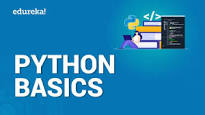

In [13]:
print(respData)

### Parsing with BeautifulSoup

### Beautiful Soup is a Python Library for pulling data out of HTML and XML files.
### It can be used instead of doing the above process manually.
### You just have to specify the tag against which you want the data.

In [14]:
from bs4 import BeautifulSoup

In [15]:
mydata=urlopen("https://in.finance.yahoo.com/q?s=SBIN.BO").read()
soup = BeautifulSoup(mydata,'lxml')

In [16]:
soup.findAll("a")
## 'a' tag is for hyperlinks. This will extract all tage with hyperlink.

[<a class="Bgpx(0) Bgr(nr) Cur(p) D(b) H(35px) Bgz(702px) Mx(a)! W(92px)" data-reactid="12" href="https://in.finance.yahoo.com/" id="uh-logo"><b class="Hidden" data-reactid="13">Yahoo</b></a>,
 <a class="Pos(r) D(ib) Ta(s) Td(n):h" data-reactid="45" href="https://mail.yahoo.com/?.intl=in&amp;.lang=en-IN&amp;.partner=none&amp;.src=finance" id="uh-mail"><svg class="Cur(p)" data-icon="NavMail" data-reactid="46" height="35" style="fill:#400090;stroke:#400090;stroke-width:0;vertical-align:bottom;" viewbox="0 0 512 512" width="30"><path d="M460.586 91.31H51.504c-10.738 0-19.46 8.72-19.46 19.477v40.088l224 104.03 224-104.03v-40.088c0-10.757-8.702-19.478-19.458-19.478M32.046 193.426V402.96c0 10.758 8.72 19.48 19.458 19.48h409.082c10.756 0 19.46-8.722 19.46-19.48V193.428l-224 102.327-224-102.327z" data-reactid="47"></path></svg><b class="Lh(userNavTextLh) D(ib) C($c-fuji-purple-1-c) Fz(14px) Fw(b) Va(t) Mstart(6px)" data-reactid="48">Mail</b></a>,
 <a class="Lh(50px) Ta(c) Bdbw(3px) Bdbs(s) Px(

In [21]:
soup.findall

In [17]:
all_links=soup.findAll("a")
for elem in all_links:
    link=str(elem.get('href'))
    print(link)

https://in.finance.yahoo.com/
https://mail.yahoo.com/?.intl=in&.lang=en-IN&.partner=none&.src=finance
/quote/SBIN.BO?p=SBIN.BO
/quote/SBIN.BO/key-statistics?p=SBIN.BO
/quote/SBIN.BO/history?p=SBIN.BO
/quote/SBIN.BO/profile?p=SBIN.BO
/quote/SBIN.BO/financials?p=SBIN.BO
/quote/SBIN.BO/analysis?p=SBIN.BO
/quote/SBIN.BO/options?p=SBIN.BO
/quote/SBIN.BO/holders?p=SBIN.BO
/quote/SBIN.BO/sustainability?p=SBIN.BO
/quote/SBIN.BO/news?p=SBIN.BO
/quote/SBIN.BO/press-releases?p=SBIN.BO
/news/indian-shares-rise-special-muhurat-154020430.html
/news/state-bank-india-profit-triples-091717253.html
/news/sbis-credit-card-business-aims-113627485.html
/news/state-bank-india-cuts-benchmark-082101757.html
/news/state-bank-india-seeks-bids-071022814.html
/news/sbi-posts-profit-first-quarter-083245260.html
/news/exclusive-sbi-tightens-lending-terms-175533859.html
/news/exclusive-indias-sbi-tightens-lending-175450256.html
/news/sbi-cuts-deposit-rates-keeps-104228583.html
/news/jet-airways-lenders-approve-inter

In [18]:
len(soup.findAll('table'))

2

### table is for table
### tr is for rows
### td is for cell

In [19]:
mytable=soup.findAll('table')[0]
mytable.findAll('tr')

[<tr class="Bxz(bb) Bdbw(1px) Bdbs(s) Bdc($seperatorColor) H(36px)" data-reactid="11"><td class="C($primaryColor) W(51%)" data-reactid="12"><span data-reactid="13">Previous close</span></td><td class="Ta(end) Fw(600) Lh(14px)" data-reactid="14" data-test="PREV_CLOSE-value"><span class="Trsdu(0.3s)" data-reactid="15">312.25</span></td></tr>,
 <tr class="Bxz(bb) Bdbw(1px) Bdbs(s) Bdc($seperatorColor) H(36px)" data-reactid="16"><td class="C($primaryColor) W(51%)" data-reactid="17"><span data-reactid="18">Open</span></td><td class="Ta(end) Fw(600) Lh(14px)" data-reactid="19" data-test="OPEN-value"><span class="Trsdu(0.3s)" data-reactid="20">312.80</span></td></tr>,
 <tr class="Bxz(bb) Bdbw(1px) Bdbs(s) Bdc($seperatorColor) H(36px)" data-reactid="21"><td class="C($primaryColor) W(51%)" data-reactid="22"><span data-reactid="23">Bid</span></td><td class="Ta(end) Fw(600) Lh(14px)" data-reactid="24" data-test="BID-value"><span class="Trsdu(0.3s)" data-reactid="25">313.50 x 0</span></td></tr>,
 

In [20]:
for rows in mytable.findAll('tr'):
    data=rows.findAll('td')
    print_data=[]
    for d in data:
        print_data.append(d.text)
    print(print_data)

['Previous close', '312.25']
['Open', '312.80']
['Bid', '313.50 x 0']
['Ask', '313.50 x 0']
["Day's range", '308.70 - 315.10']
['52-week range', '244.35 - 373.70']
['Volume', '2,137,459']
['Avg. volume', '1,807,663']


# Twitter API

<ol>
<li>Create a Twitter user account if you do not already have one. Make sure that you have added phone number to your account</li>
<li>Go to https://apps.twitter.com/ and log in with your Twitter user account. This step gives you a Twitter dev account under the same name as your user account.</li>
<li>Click “Create New App”</li>
<li>Fill out the form, agree to the terms, and click “Create your Twitter application”</li>
<li>In the next page, click on “Keys and Access Tokens” tab, and copy your “API key” and “API secret”. Scroll down and click “Create my access token”, and copy your “Access token” and “Access token secret”.</li>
</ol>

In [23]:
!pip install twitter

In [24]:
from twitter import Twitter, OAuth, TwitterHTTPError, TwitterStream

In [25]:
twitter_info_file=r"C:\Users\harya\Desktop\Edvancer\twitter_acc_info.txt"

f=open(twitter_info_file,"r")
mykeys=[]

for line in f:
    mykeys.append(line.split(':')[1].strip())
print(mykeys)

['0SqpEGdgHoeASYULRoEeFCAJ0', 'cGIPkN8AcVZ2cynMLJUyxSgUjKi95kxRz2GlEIQzvTMBa6sW42', '917073401839259648-zAo8PSfGTp35Iqi8HmWdoT4K3UVBhhs', 'qtDgNLeuyuGdXvVC7vunxU86yf24P7yCgGTnldW6KaRUA']


In [26]:
CONSUMER_KEY,CONSUMER_SECRET,ACCESS_TOKEN,ACCESS_SECRET=mykeys

you can very well manually assign values directly in the script instead of putting them in a file first 

In [27]:
oauth = OAuth(ACCESS_TOKEN, ACCESS_SECRET, CONSUMER_KEY, CONSUMER_SECRET)
twitter= Twitter(auth=oauth)

In [29]:
# more details on the request parameters here :
# https://dev.twitter.com/rest/public/search
twitter.search.tweets(q='mumbai monsoon', result_type='recent', lang='en',
                      count=3)
#can we convert these json dumps to pandas dataframes


{'statuses': [{'created_at': 'Sat Nov 02 06:04:32 +0000 2019',
   'id': 1190509979897171968,
   'id_str': '1190509979897171968',
   'text': 'RT @ritika_offl: Mumbai monsoon is lasting longer than most relationships these days \n\n#MumbaiRains https://t.co/eNPVMntzF6',
   'truncated': False,
   'entities': {'hashtags': [{'text': 'MumbaiRains', 'indices': [87, 99]}],
    'symbols': [],
    'user_mentions': [{'screen_name': 'ritika_offl',
      'name': 'Ritika Singh',
      'id': 4224432261,
      'id_str': '4224432261',
      'indices': [3, 15]}],
    'urls': [],
    'media': [{'id': 1190259054326796288,
      'id_str': '1190259054326796288',
      'indices': [100, 123],
      'media_url': 'http://pbs.twimg.com/media/EISmTbvXUAAB1oK.jpg',
      'media_url_https': 'https://pbs.twimg.com/media/EISmTbvXUAAB1oK.jpg',
      'url': 'https://t.co/eNPVMntzF6',
      'display_url': 'pic.twitter.com/eNPVMntzF6',
      'expanded_url': 'https://twitter.com/ritika_offl/status/1190259066926317568/phot

### Twitter Stream

In [30]:
twitter_stream = TwitterStream(auth=oauth)

In [31]:
import json
iterator = twitter_stream.statuses.sample()

tweet_count = 10
for tweet in iterator:
    tweet_count -= 1
    
    print(json.dumps(tweet) )
       
    if tweet_count <= 0:
        break 

{"delete": {"status": {"id": 1187386876774109185, "id_str": "1187386876774109185", "user_id": 1167962782798450688, "user_id_str": "1167962782798450688"}, "timestamp_ms": "1572677476399"}}
{"created_at": "Sat Nov 02 06:51:16 +0000 2019", "id": 1190521741509922818, "id_str": "1190521741509922818", "text": "\u914d\u4fe1\u4e2d\u3054\u3081\u3093\u306a\u3055\u3044\ud83d\ude47\ud83d\udca6\n\u30cd\u30c3\u30c8\u30ef\u30fc\u30af\u304a\u3061\u307e\u3057\u305f\u3002\u3002\u3002", "source": "<a href=\"http://twitter.com/download/iphone\" rel=\"nofollow\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 1061565363094089728, "id_str": "1061565363094089728", "name": "mocotarian@\u6c57\u307e\u307f\u308c", "screen_name": "mocotarianbo41", "location": "PS4\u524d", "url": "https://www.youtube.com/channel/UCcNSjE_kY5MS_dEWGS_LULA", "desc

### Tracking a specific keyword in stream

In [33]:
iterator = twitter_stream.statuses.filter(track="Yes Bank", language="en")
tweet_count = 3
for tweet in iterator:
    tweet_count -= 1
    
    print(json.dumps(tweet) )
       
    if tweet_count <= 0:
        break

TwitterHTTPError: Twitter sent status 420 for URL: 1.1/statuses/filter.json using parameters: (language=en&oauth_consumer_key=0SqpEGdgHoeASYULRoEeFCAJ0&oauth_nonce=14164277380295197320&oauth_signature_method=HMAC-SHA1&oauth_timestamp=1572678429&oauth_token=917073401839259648-zAo8PSfGTp35Iqi8HmWdoT4K3UVBhhs&oauth_version=1.0&track=Yes%20Bank&oauth_signature=VWHewF6TmTX70XjV5w7%2F2Vw8EI8%3D)
details: Exceeded connection limit for user


### trends API

In [42]:
world_trends = twitter.trends.available(_woeid=1)
world_trends[1:3]

[{'name': 'Winnipeg',
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/2972',
  'parentid': 23424775,
  'country': 'Canada',
  'woeid': 2972,
  'countryCode': 'CA'},
 {'name': 'Ottawa',
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/3369',
  'parentid': 23424775,
  'country': 'Canada',
  'woeid': 3369,
  'countryCode': 'CA'}]

In [45]:
hyd_trend=twitter.trends.place(_id = 2295019)

TwitterHTTPError: Twitter sent status 404 for URL: 1.1/trends/place.json using parameters: (id=2295019&oauth_consumer_key=0SqpEGdgHoeASYULRoEeFCAJ0&oauth_nonce=7019651095637123823&oauth_signature_method=HMAC-SHA1&oauth_timestamp=1572679272&oauth_token=917073401839259648-zAo8PSfGTp35Iqi8HmWdoT4K3UVBhhs&oauth_version=1.0&oauth_signature=EoxgtpedJZl3FOTTfDGePcWzxo0%3D)
details: {'errors': [{'code': 34, 'message': 'Sorry, that page does not exist.'}]}

In [36]:
print(json.dumps(hyd_trend, indent=4))

[
    {
        "trends": [
            {
                "name": "#HappyBirthdayShahRukhKhan",
                "url": "http://twitter.com/search?q=%23HappyBirthdayShahRukhKhan",
                "promoted_content": null,
                "query": "%23HappyBirthdayShahRukhKhan",
                "tweet_volume": null
            },
            {
                "name": "#\u091b\u0920_\u092e\u0939\u093e\u092a\u0930\u094d\u0935",
                "url": "http://twitter.com/search?q=%23%E0%A4%9B%E0%A4%A0_%E0%A4%AE%E0%A4%B9%E0%A4%BE%E0%A4%AA%E0%A4%B0%E0%A5%8D%E0%A4%B5",
                "promoted_content": null,
                "query": "%23%E0%A4%9B%E0%A4%A0_%E0%A4%AE%E0%A4%B9%E0%A4%BE%E0%A4%AA%E0%A4%B0%E0%A5%8D%E0%A4%B5",
                "tweet_volume": null
            },
            {
                "name": "#DelhiAirEmergency",
                "url": "http://twitter.com/search?q=%23DelhiAirEmergency",
                "promoted_content": null,
                "query": "%23DelhiAirEmergency"

### User API

In [37]:
# Get a list of followers of a particular user
twitter.followers.ids(screen_name="lalitsachan")

{'ids': [750514308,
  864692118979133440,
  115462658,
  113005648,
  101192601,
  187147213,
  3259803662,
  2816711822,
  68083142,
  1046409982315569153,
  2160764251,
  52296616,
  444773141,
  953144690,
  2192541036,
  149111248,
  140723981,
  519447054,
  475999445,
  2282790061,
  512566966,
  1691550589,
  1722018122,
  389315480,
  110192613,
  14207036,
  629338382,
  106166726,
  102301653,
  63419474,
  93499670,
  81534295,
  71741490,
  13623812,
  54273122],
 'next_cursor': 0,
 'next_cursor_str': '0',
 'previous_cursor': 0,
 'previous_cursor_str': '0',
 'total_count': None}

In [38]:
twitter.statuses.user_timeline(screen_name="lalitsachan")

[{'created_at': 'Mon Oct 21 04:22:15 +0000 2019',
  'id': 1186135585670385665,
  'id_str': '1186135585670385665',
  'text': 'RT @ErikSolheim: This world talks too much. I rather went on a date with our ocean.\n\nThe incredible story on how Afroz Shah mobilized tens,…',
  'truncated': False,
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [{'screen_name': 'ErikSolheim',
     'name': 'Erik Solheim',
     'id': 48702842,
     'id_str': '48702842',
     'indices': [3, 15]}],
   'urls': []},
  'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_id_str': None,
  'in_reply_to_screen_name': None,
  'user': {'id': 61981057,
   'id_str': '61981057',
   'name': 'Lalit Sachan',
   'screen_name': 'lalitsachan',
   'location': 'Mumbai',
   'description': 'up down up',
   'url': 'http://t.co/cv1odC6RkW',
   'entities': {'url': {

# Exercises

* find out how to save files to your own machine using urllib
* find out how to convert json dumps to pandas dataframes